
Training with SGD optimizer:
[SGD] Step 0: Loss = 12.5720, w = 0.3748, b = 0.6875
[SGD] Step 20: Loss = 0.1306, w = 1.8103, b = 2.6130
[SGD] Step 40: Loss = 0.0802, w = 2.0931, b = 2.4786
[SGD] Step 60: Loss = 0.0508, w = 2.3062, b = 2.3706
[SGD] Step 80: Loss = 0.0338, w = 2.4689, b = 2.2882

Final parameters with SGD: w = 2.5876, b = 2.2280

Training with RMSprop optimizer:
[RMSprop] Step 0: Loss = 12.5720, w = 0.0316, b = 0.0316
[RMSprop] Step 20: Loss = 9.7725, w = 0.2905, b = 0.2903
[RMSprop] Step 40: Loss = 8.0153, w = 0.4871, b = 0.4867
[RMSprop] Step 60: Loss = 6.4766, w = 0.6786, b = 0.6777
[RMSprop] Step 80: Loss = 5.1139, w = 0.8684, b = 0.8672

Final parameters with RMSprop: w = 1.0476, b = 1.0458

Training with Adam optimizer:
[Adam] Step 0: Loss = 12.5720, w = 0.0500, b = 0.0500
[Adam] Step 20: Loss = 4.4019, w = 1.0133, b = 1.0119
[Adam] Step 40: Loss = 0.8993, w = 1.7811, b = 1.7686
[Adam] Step 60: Loss = 0.1007, w = 2.2391, b = 2.1962
[Adam] Step 80: Loss = 0.0387, w 

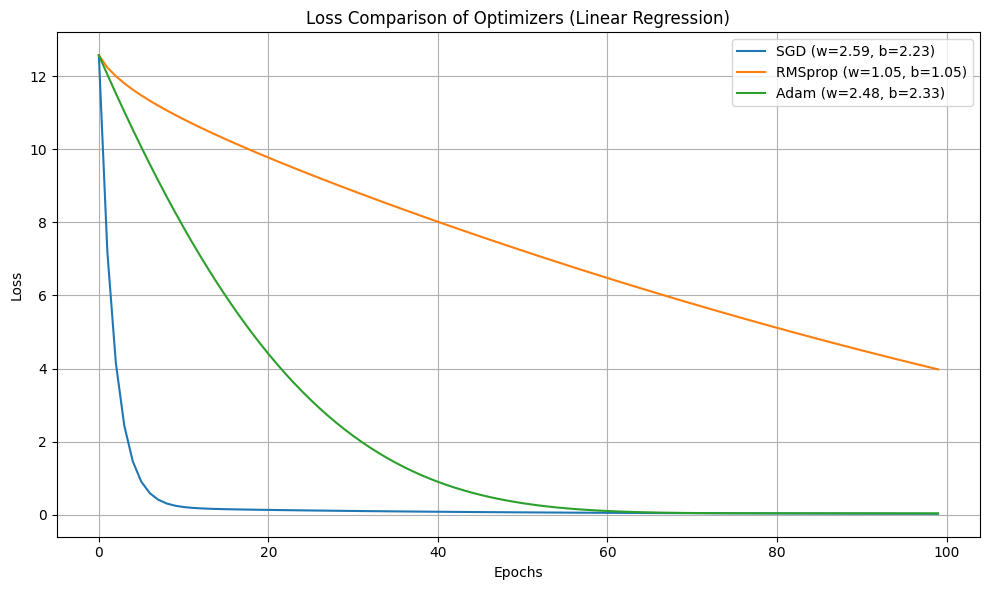

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for linear regression: y = 3x + 2 + noise
np.random.seed(0)
X = np.random.rand(100).astype(np.float32)
Y = 3 * X + 2 + np.random.normal(0, 0.1, 100).astype(np.float32)

# Function to train a linear model using a given optimizer
def train_model(optimizer_name, optimizer, epochs=100):
    # Initialize weights and bias for each optimizer separately
    w = tf.Variable(0.0)
    b = tf.Variable(0.0)
    loss_history = []

    for step in range(epochs):
        with tf.GradientTape() as tape:
            y_pred = w * X + b
            loss = tf.reduce_mean(tf.square(Y - y_pred))
        grads = tape.gradient(loss, [w, b])
        optimizer.apply_gradients(zip(grads, [w, b]))
        loss_history.append(loss.numpy())

        if step % 20 == 0:
            print(f"[{optimizer_name}] Step {step}: Loss = {loss.numpy():.4f}, w = {w.numpy():.4f}, b = {b.numpy():.4f}")

    print(f"\nFinal parameters with {optimizer_name}: w = {w.numpy():.4f}, b = {b.numpy():.4f}")
    return loss_history, w.numpy(), b.numpy()

# Define optimizers
optimizers = {
    "SGD": tf.optimizers.SGD(learning_rate=0.1),
    "RMSprop": tf.optimizers.RMSprop(learning_rate=0.01),
    "Adam": tf.optimizers.Adam(learning_rate=0.05)
}

# Train using each optimizer and store results
results = {}
for name, opt in optimizers.items():
    print(f"\nTraining with {name} optimizer:")
    loss_hist, w_final, b_final = train_model(name, opt)
    results[name] = {
        "loss_history": loss_hist,
        "w": w_final,
        "b": b_final
    }

# Plot loss curves
plt.figure(figsize=(10, 6))
for name, res in results.items():
    plt.plot(res["loss_history"], label=f'{name} (w={res["w"]:.2f}, b={res["b"]:.2f})')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Comparison of Optimizers (Linear Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
